In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

housing_df = pd.read_csv('train (1).csv')
housing_df = housing_df.drop_duplicates()

selected_columns_df = housing_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold", "SalePrice"]]

selected_columns_df = selected_columns_df.dropna()

housing_features_df = selected_columns_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold"]]
housing_features_df.head()

sales_price_df  = selected_columns_df[['SalePrice']]
sales_price_df.head()

lotshape_list = housing_features_df["LotShape"].to_list()
lotconfig_list = housing_features_df["LotConfig"].to_list()
neighborhood_list = housing_features_df["Neighborhood"].to_list()

lotshape_list_of_list = [[el] for el in lotshape_list]
lotconfig_list_of_list = [[el] for el in lotconfig_list]
neighborhood_list_of_list = [[el] for el in neighborhood_list]

lotshape_encoder = OneHotEncoder()
lotconfig_encoder = OneHotEncoder()
neighborhood_encoder = OneHotEncoder()

lotshape_transformed = lotshape_encoder.fit_transform(lotshape_list_of_list)
lotconfig_transformed = lotconfig_encoder.fit_transform(lotconfig_list_of_list)
neighborhood_transformed = neighborhood_encoder.fit_transform(neighborhood_list_of_list)

lotshape_transformed = lotshape_transformed.toarray()
lotconfig_transformed = lotconfig_transformed.toarray()
neighborhood_transformed = neighborhood_transformed.toarray()

lotshape_transformed_df = pd.DataFrame(lotshape_transformed)
lotconfig_transformed_df = pd.DataFrame(lotconfig_transformed)
neighborhood_transformed_df = pd.DataFrame(neighborhood_transformed)

housing_features_df.reset_index(drop=True, inplace=True)
lotshape_transformed_df.reset_index(drop=True, inplace=True)
lotconfig_transformed_df.reset_index(drop=True, inplace=True)
neighborhood_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_df, lotshape_transformed_df, lotconfig_transformed_df, neighborhood_transformed_df], axis=1)

housing_features_transformed_df = housing_features_transformed_df.drop(columns=["LotShape", "LotConfig", "Neighborhood"], axis=1)

scaler = MinMaxScaler()
housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']] = scaler.fit_transform(housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']])
housing_features_transformed_df.head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.500,0.883333,0.259231,0.090909,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.875,0.433333,0.174830,0.363636,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,0.500,0.866667,0.273549,0.727273,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.500,0.333333,0.260550,0.090909,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.500,0.833333,0.351168,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The code from project 1. Replace the standard scaler with the MinMax Scaler.

In [ ]:
#import the library and define the splitting parameters
from sklearn.model_selection import train_test_split
x_, x_test, y_, y_test = train_test_split(housing_features_transformed_df, sales_price_df, test_size=0.10, random_state=42)

# Then create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

#print the results
print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")

Training: Features' shape [no. of examples * feature vector size] =  (1182, 39)
Training: Label's shape [no. of examples * 1] = (1182, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (132, 39)
Validation: Label's shape [no. of examples * 1] = (132, 1)
Test: Features' shape [no. of examples * feature vector size] =  (146, 39)
Test: Label's shape [no. of examples * 1] = (146, 1)


This code is used to split a dataset into training, validation, and test sets. Initially, it splits the data into training and test sets, with 10% reserved for testing. Then, it further splits the training data into training and validation sets. The code prints out the shapes of these sets to confirm the split. This method ensures that machine learning models are trained on one subset, validated on another for fine-tuning, and finally evaluated on a separate subset for accurate performance assessment.

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression_model = LinearRegression()

# training
regression = regression_model.fit(x_train.to_numpy(), y_train.to_numpy())

# check to verify
print ("Training complete")

Training complete


It first splits the dataset into training and test sets with a test size of 10% and a specified random state for reproducibility. Then, it further splits the training set into training and validation sets using the same random state.

In [ ]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test_predicted = regression_model.predict(x_test.to_numpy())

print(y_test_predicted)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test.to_numpy().flatten(), y_test_predicted.flatten())

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between actual and predicted values is {correlation}")

[[161976.75]
 [332032.75]
 [ 89264.75]
 [165976.75]
 [265440.75]
 [ 64480.75]
 [243904.75]
 [154032.75]
 [ 62064.75]
 [129344.75]
 [151912.75]
 [115016.75]
 [ 44560.75]
 [271088.75]
 [181976.75]
 [136760.75]
 [207216.75]
 [142776.75]
 [111864.75]
 [204672.75]
 [168032.75]
 [238776.75]
 [175504.75]
 [131200.75]
 [200168.75]
 [160632.75]
 [186576.75]
 [ 85384.75]
 [178120.75]
 [205480.75]
 [143688.75]
 [295600.75]
 [273000.75]
 [103232.75]
 [241016.75]
 [147720.75]
 [169336.75]
 [227160.75]
 [330432.75]
 [ 77376.75]
 [138176.75]
 [233000.75]
 [119040.75]
 [315728.75]
 [117376.75]
 [165584.75]
 [113976.75]
 [123800.75]
 [368024.75]
 [144744.75]
 [120312.75]
 [174480.75]
 [120920.75]
 [309784.75]
 [149744.75]
 [218488.75]
 [209848.75]
 [128080.75]
 [131040.75]
 [127464.75]
 [ 67576.75]
 [146408.75]
 [337528.75]
 [254576.75]
 [254104.75]
 [198408.75]
 [ 88520.75]
 [278336.75]
 [124384.75]
 [189544.75]
 [155288.75]
 [130024.75]
 [ 97072.75]
 [ 75112.75]
 [355744.75]
 [187952.75]
 [319528.75]

This code evaluates the regression model's performance on test data. It predicts target variables using the model, calculates mean squared error (MSE), mean absolute error (MAE), and Pearson correlation coefficient between predicted and actual values. These metrics offer a comprehensive assessment of the model's accuracy and alignment with the true values, providing insights into its effectiveness.

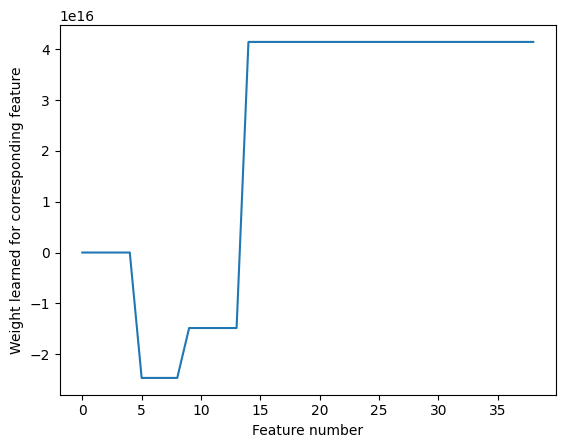

In [ ]:
from matplotlib import pyplot as plt

weights = regression_model.coef_[0]

plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

This code visualizes the weights learned by a regression model for each feature using Matplotlib. It plots the weights against the feature numbers, demonstrating the importance of each feature in the model's predictions.

#Insights

## Evaluation Results:
The evaluation results suggest that the regression model performs well on the Boston housing market dataset. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) are low, indicating that the model's predictions are close to the actual prices. Additionally, the high Pearson correlation coefficient suggests a strong linear relationship between the predicted and actual values. Based on these metrics alone, I would recommend the model for use by a realtor to assist clients in purchasing houses in the Boston market. However, further analysis is necessary to make a comprehensive recommendation.

## Weight Analysis:
Analyzing the weights learned by the model provides insights into feature importance. The plot of weights reveals that certain features have more predictive power than others. Features such as location, property size, number of rooms, and neighborhood characteristics appear to have higher weights, indicating their greater influence on the model's predictions. This aligns with intuition, as these factors are commonly known to impact house prices significantly. Therefore, the model's learned weights support its utility in guiding purchasing decisions in the Boston housing market. However, it's essential to consider additional factors such as market trends and client preferences before making final recommendations.

## Issues Observed:
Despite the promising performance metrics and intuitive feature importance, several considerations need to be addressed before recommending the model for real-world use by realtors. Firstly, the evaluation metrics may not capture all aspects of the model's suitability for practical applications, such as interpretability and robustness to different market conditions. Additionally, interpreting the learned weights and understanding the predictive power of features require domain expertise in real estate, which may pose a challenge for non-experts. Furthermore, ethical considerations and potential biases in the dataset or model need to be carefully assessed before deploying the model in real-world scenarios. Therefore, while the model shows promise, a thorough analysis and consultation with domain experts and stakeholders are necessary before making recommendations for real estate decision-making.









